In [1]:
import pandas as pd #importing pandas
import numpy as np #importing numpy
import seaborn as sns #importing seaborn
import matplotlib.pyplot as plt #importing matplotlib


In [2]:
boston = pd.read_csv("K:\DATA SCIENCE\DataSets\housing.csv", header= None, delimiter=r"\s+")

In [3]:
boston.columns =['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [4]:
boston.shape

(506, 14)

In [5]:
boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [6]:
boston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

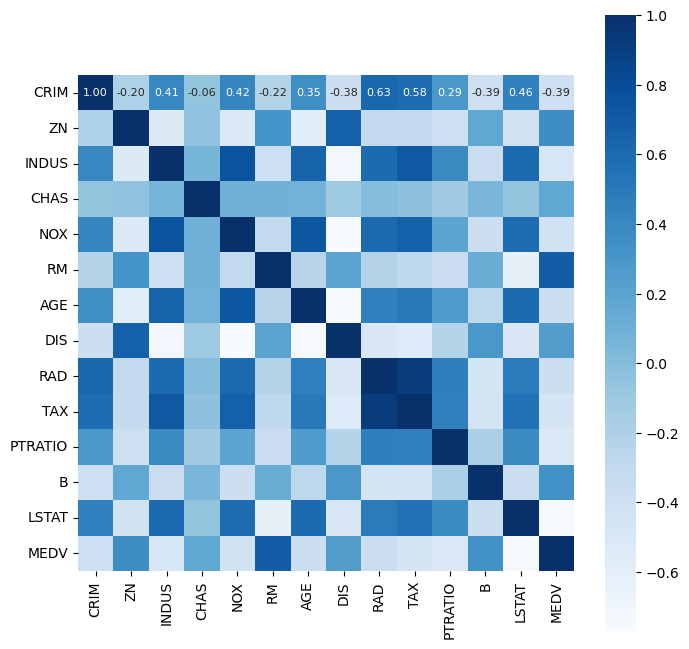

In [7]:
corrmat = boston.corr()
plt.figure(figsize = (8, 8))
sns.heatmap(corrmat, cbar = True, square = True, fmt ='.2f',cmap='Blues',annot=True, annot_kws = {'size':8})
plt.show()

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X = boston.iloc[:,:-1]
y = boston.iloc[:,13]

In [24]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33


In [25]:
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: MEDV, dtype: float64

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)

In [12]:
X.shape, X_train.shape, X_test.shape

((506, 13), (404, 13), (102, 13))

#  Using XGB Regressor

In [13]:
from xgboost import XGBRegressor

In [14]:
xgbr = XGBRegressor()

In [15]:
xgbr.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [16]:
pred_xgbr = xgbr.predict(X_test)

In [17]:
from sklearn import metrics

In [18]:
score1 = metrics.r2_score(y_test, pred_xgbr)
score2 = metrics.mean_absolute_error(y_test, pred_xgbr)
print('R2 Score:',score1)
print('Mean Absolute Error:',score2)

R2 Score: 0.9051721149855378
Mean Absolute Error: 2.0748727686264927


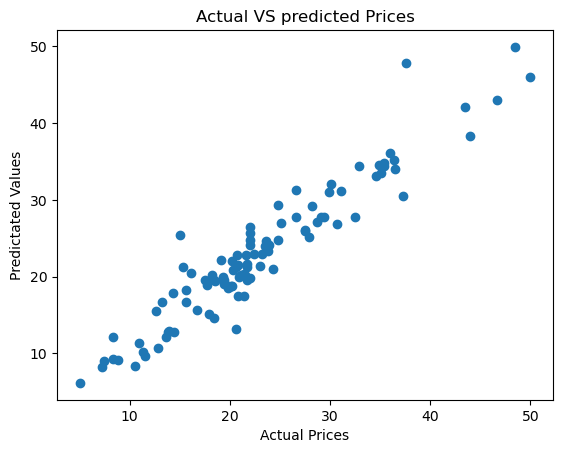

In [19]:
plt.scatter(y_test, pred_xgbr)
plt.ylabel('Predictated Values')
plt.xlabel('Actual Prices')
plt.title('Actual VS predicted Prices')
plt.show()

We can see that most of the values are predicted near right. 

# Pickling the model for Deployment

In [20]:
import pickle

with the use of pickle function we will save our file 

In [21]:
pickle.dump(xgbr, open('xgbrmodel.pkl','wb')) 

After saving we can load file anywhere and use it 

In [23]:
predict_model = pickle.load(open('xgbrmodel.pkl','rb'))

preparing data for prediction

In [33]:
data = X.iloc[4].to_numpy()

In [37]:
data1 = data.reshape(1,-1)

In [38]:
predict_model.predict(data1)

array([36.19345], dtype=float32)

It has predicted the right value which is 36.2